In [25]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df = pd.read_csv("Fraud Detection Credit Card Dataset.csv")


df2 = pd.read_csv('Main Dataset.csv')

df

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,12342,Platinum,Success
4,3958,4.96,3/1/2019 10:54,misc_net,1926072.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,3,17157,Platinum,Failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,105392,2.13,2/3/2019 13:12,misc_pos,334683.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,80990,Signature,Success
153,106083,2.13,2/3/2019 18:13,shopping_net,454570.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,3,42831,Signature,Success
154,106493,2.13,2/3/2019 21:15,kids_pets,454519.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,1,27506,Signature,Success
155,106857,2.13,2/3/2019 23:59,kids_pets,358047.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,84565,Signature,Success


In [6]:
df.describe()

,Transaction Number,Customer ID,Amount Transacted,Credit Limit,No of Transactions,Amounts received per day
count,157.000000,157.000000,1.540000e+02,156.000000,157.000000,157.000000
mean,65529.292994,4.712102,5.434962e+05,814423.076923,1.719745,59053.515924
std,96046.676020,1.514083,2.736553e+05,202644.581232,0.807294,67690.002232
min,19.000000,1.800000,1.056900e+05,400000.000000,1.000000,0.000000
25%,12867.000000,3.720000,3.341860e+05,700000.000000,1.000000,32555.000000
50%,29421.000000,4.960000,4.905690e+05,900000.000000,2.000000,53510.000000
75%,66406.000000,6.040000,7.289578e+05,1000000.000000,2.000000,77585.000000
max,439223.000000,6.590000,1.926072e+06,1000000.000000,5.000000,832630.000000


In [8]:
df.isnull().any()

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted             True
First                        False
Last                         False
Gender                       False
Street                        True
City                         False
Credit Limit                  True
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [9]:
df.isnull().sum() #checking number of null values per column

Transaction Number           0
Customer ID                  0
Time stamp                   0
Category                     0
Amount Transacted            3
First                        0
Last                         0
Gender                       0
Street                       7
City                         0
Credit Limit                 1
No of Transactions           0
Amounts received per day     0
Card Type                    0
Authentication               0
dtype: int64

In [10]:
#updating missing values
df['Customer ID'].unique()


array([4.96, 6.59, 2.23, 3.73, 6.04, 5.81, 3.72, 3.58, 4.04, 5.72, 1.8 ,
       5.02, 6.3 , 3.86, 2.13])

In [11]:
from operator import index


customer_ID = df['Customer ID'].unique()
print(customer_ID)
First = df['First'].unique() #calling first names to use them in the next analysis
print(First)
print (customer_ID[0])
print (First[0])
id = [i for i in range (len(customer_ID))]
print(id)
fdf = pd.DataFrame(id, First )
fdf


[4.96 6.59 2.23 3.73 6.04 5.81 3.72 3.58 4.04 5.72 1.8  5.02 6.3  3.86
 2.13]
['Kenneth' 'Amanda' 'Thomas' 'Bobby' 'Bradley' 'Jessica' 'Rick' 'Deborah'
 'Jeffrey' 'Susan' 'Richard' 'Angelica' 'Heather' 'Jacqueline' 'Rebecca']
4.96
Kenneth
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


,0
Kenneth,0
Amanda,1
Thomas,2
Bobby,3
Bradley,4
Jessica,5
Rick,6
Deborah,7
Jeffrey,8
Susan,9


In [12]:
id = [i for i in range (len(customer_ID))]
id

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
df.loc[(customer_ID[0]) == df ['Customer ID']]

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,12342,Platinum,Success
4,3958,4.96,3/1/2019 10:54,misc_net,1926072.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,3,17157,Platinum,Failed
5,4223,4.96,3/1/2019 15:19,shopping_net,482394.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10003,Platinum,Success
6,4603,4.96,3/1/2019 21:32,food_dining,718346.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,14325,Platinum,Success
7,5763,4.96,4/1/2019 17:57,health_fitness,491598.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,3,15098,Platinum,Success
8,5792,4.96,4/1/2019 18:12,shopping_pos,848852.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,19224,Platinum,Success
9,5819,4.96,4/1/2019 18:39,misc_pos,396139.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,67932,Platinum,Success


In [13]:
#insert cutomer ID 4.96 in a data frame
Kenneth = df.loc[(customer_ID[0]) == df ['Customer ID']]
Kenneth

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,12342,Platinum,Success
4,3958,4.96,3/1/2019 10:54,misc_net,1926072.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,3,17157,Platinum,Failed
5,4223,4.96,3/1/2019 15:19,shopping_net,482394.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10003,Platinum,Success
6,4603,4.96,3/1/2019 21:32,food_dining,718346.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,14325,Platinum,Success
7,5763,4.96,4/1/2019 17:57,health_fitness,491598.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,3,15098,Platinum,Success
8,5792,4.96,4/1/2019 18:12,shopping_pos,848852.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,19224,Platinum,Success
9,5819,4.96,4/1/2019 18:39,misc_pos,396139.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,67932,Platinum,Success


In [16]:
Kenneth.describe() #summary statistics for data frame Kenneth

,Transaction Number,Customer ID,Amount Transacted,Credit Limit,No of Transactions,Amounts received per day
count,16.000000,1.600000e+01,1.600000e+01,16.0,16.0000,16.000000
mean,5420.562500,4.960000e+00,7.698652e+05,1000000.0,1.6875,29796.750000
std,2880.722501,9.173067e-16,3.883101e+05,0.0,0.7932,22215.038475
min,19.000000,4.960000e+00,2.048500e+05,1000000.0,1.0000,10003.000000
25%,3681.250000,4.960000e+00,4.892970e+05,1000000.0,1.0000,14904.750000
50%,5777.500000,4.960000e+00,8.147605e+05,1000000.0,1.5000,22330.500000
75%,8017.250000,4.960000e+00,8.967755e+05,1000000.0,2.0000,30851.000000
max,9273.000000,4.960000e+00,1.926072e+06,1000000.0,3.0000,82475.000000


In [17]:
Kenneth.isnull().any() #no missing values in data frame Kenneth

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [18]:
df.loc[(customer_ID[1]) == df ['Customer ID']] #displays customer ID index one in Customer ID data Frame



,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
16,51250,6.59,30/01/2019 23:16,kids_pets,297820.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,2,42187,Platinum,Success
17,51528,6.59,31/01/2019 05:41,grocery_net,687879.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,3,98637,Platinum,Success
18,53779,6.59,1/2/2019 20:58,personal_care,738456.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,21304,Platinum,Success
19,56675,6.59,3/2/2019 15:56,shopping_net,378535.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,73556,Platinum,Success
20,59880,6.59,4/2/2019 23:48,shopping_pos,334116.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,2,36610,Platinum,Success
21,61639,6.59,5/2/2019 19:02,home,772360.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,80962,Platinum,Success
22,70418,6.59,11/2/2019 11:08,misc_net,580796.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,46701,Platinum,Success
23,71568,6.59,11/2/2019 20:56,shopping_pos,855465.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,66856,Platinum,Success
24,77745,6.59,15/02/2019 19:25,food_dining,978989.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,3,33911,Platinum,Success
25,79300,6.59,16/02/2019 21:09,health_fitness,451874.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,62217,Platinum,Success


In [20]:
Amanda = df.loc[(customer_ID[1])== df['Customer ID']] #storing in Variable Amanda
Amanda

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
16,51250,6.59,30/01/2019 23:16,kids_pets,297820.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,2,42187,Platinum,Success
17,51528,6.59,31/01/2019 05:41,grocery_net,687879.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,3,98637,Platinum,Success
18,53779,6.59,1/2/2019 20:58,personal_care,738456.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,21304,Platinum,Success
19,56675,6.59,3/2/2019 15:56,shopping_net,378535.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,73556,Platinum,Success
20,59880,6.59,4/2/2019 23:48,shopping_pos,334116.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,2,36610,Platinum,Success
21,61639,6.59,5/2/2019 19:02,home,772360.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,80962,Platinum,Success
22,70418,6.59,11/2/2019 11:08,misc_net,580796.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,46701,Platinum,Success
23,71568,6.59,11/2/2019 20:56,shopping_pos,855465.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,66856,Platinum,Success
24,77745,6.59,15/02/2019 19:25,food_dining,978989.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,3,33911,Platinum,Success
25,79300,6.59,16/02/2019 21:09,health_fitness,451874.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,62217,Platinum,Success


In [21]:
Amanda.isnull().any() #Street and Credit Limit have missing values

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                        True
City                         False
Credit Limit                  True
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [22]:
Amanda.describe()

,Transaction Number,Customer ID,Amount Transacted,Credit Limit,No of Transactions,Amounts received per day
count,21.000000,2.100000e+01,21.000000,20.0,21.000000,21.000000
mean,68606.809524,6.590000e+00,553622.571429,1000000.0,2.000000,42534.904762
std,17560.454703,1.820224e-15,238286.751027,0.0,1.183216,32574.106714
min,22045.000000,6.590000e+00,204850.000000,1000000.0,1.000000,0.000000
25%,56675.000000,6.590000e+00,339670.000000,1000000.0,1.000000,21304.000000
50%,77745.000000,6.590000e+00,515263.000000,1000000.0,2.000000,42187.000000
75%,81191.000000,6.590000e+00,738456.000000,1000000.0,3.000000,66856.000000
max,90210.000000,6.590000e+00,978989.000000,1000000.0,5.000000,98793.000000


In [23]:
Amanda['Street']

16    8425 Daniel Knolls Suite 288
17    8425 Daniel Knolls Suite 288
18    8425 Daniel Knolls Suite 288
19    8425 Daniel Knolls Suite 288
20    8425 Daniel Knolls Suite 288
21    8425 Daniel Knolls Suite 288
22    8425 Daniel Knolls Suite 288
23    8425 Daniel Knolls Suite 288
24    8425 Daniel Knolls Suite 288
25    8425 Daniel Knolls Suite 288
26    8425 Daniel Knolls Suite 288
27    8425 Daniel Knolls Suite 288
28    8425 Daniel Knolls Suite 288
29    8425 Daniel Knolls Suite 288
30    8425 Daniel Knolls Suite 288
31    8425 Daniel Knolls Suite 288
32                             NaN
33                             NaN
34                             NaN
35                             NaN
36                             NaN
Name: Street, dtype: object

In [24]:
Amanda['Street'].mode()

0    8425 Daniel Knolls Suite 288
Name: Street, dtype: object

In [25]:
#filling NUll Values of Street

Amanda['Street'] = Amanda['Street'].fillna(Amanda['Street'].mode())
Amanda['Street']
#this method doesn't replace the null values

C:\Users\CAROL OPIYO\AppData\Local\Temp\ipykernel_5748\4000907326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amanda['Street'] = Amanda['Street'].fillna(Amanda['Street'].mode())


16    8425 Daniel Knolls Suite 288
17    8425 Daniel Knolls Suite 288
18    8425 Daniel Knolls Suite 288
19    8425 Daniel Knolls Suite 288
20    8425 Daniel Knolls Suite 288
21    8425 Daniel Knolls Suite 288
22    8425 Daniel Knolls Suite 288
23    8425 Daniel Knolls Suite 288
24    8425 Daniel Knolls Suite 288
25    8425 Daniel Knolls Suite 288
26    8425 Daniel Knolls Suite 288
27    8425 Daniel Knolls Suite 288
28    8425 Daniel Knolls Suite 288
29    8425 Daniel Knolls Suite 288
30    8425 Daniel Knolls Suite 288
31    8425 Daniel Knolls Suite 288
32                             NaN
33                             NaN
34                             NaN
35                             NaN
36                             NaN
Name: Street, dtype: object

In [26]:
Amanda['Street'] = Amanda['Street'].replace({np.nan: '8425 Daniel Knolls Suite 288'}) #since method one has failed, we replace manually
Amanda['Street']

C:\Users\CAROL OPIYO\AppData\Local\Temp\ipykernel_5748\355663426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amanda['Street'] = Amanda['Street'].replace({np.nan: '8425 Daniel Knolls Suite 288'}) #since method one has failed, we replace manually


16    8425 Daniel Knolls Suite 288
17    8425 Daniel Knolls Suite 288
18    8425 Daniel Knolls Suite 288
19    8425 Daniel Knolls Suite 288
20    8425 Daniel Knolls Suite 288
21    8425 Daniel Knolls Suite 288
22    8425 Daniel Knolls Suite 288
23    8425 Daniel Knolls Suite 288
24    8425 Daniel Knolls Suite 288
25    8425 Daniel Knolls Suite 288
26    8425 Daniel Knolls Suite 288
27    8425 Daniel Knolls Suite 288
28    8425 Daniel Knolls Suite 288
29    8425 Daniel Knolls Suite 288
30    8425 Daniel Knolls Suite 288
31    8425 Daniel Knolls Suite 288
32    8425 Daniel Knolls Suite 288
33    8425 Daniel Knolls Suite 288
34    8425 Daniel Knolls Suite 288
35    8425 Daniel Knolls Suite 288
36    8425 Daniel Knolls Suite 288
Name: Street, dtype: object

In [27]:
Amanda['Credit Limit']

16    1000000.0
17    1000000.0
18    1000000.0
19    1000000.0
20    1000000.0
21    1000000.0
22    1000000.0
23    1000000.0
24    1000000.0
25    1000000.0
26    1000000.0
27    1000000.0
28    1000000.0
29    1000000.0
30    1000000.0
31    1000000.0
32    1000000.0
33    1000000.0
34    1000000.0
35    1000000.0
36          NaN
Name: Credit Limit, dtype: float64

In [28]:
Amanda['Credit Limit'].mean() #checking mode


1000000.0

In [ ]:
Amanda['Credit Limit'] = Amanda['Credit Limit'].fillna(Amanda['Credit Limit'].mean())
Amanda['Credit Limit']

<ipython-input-340-1d2ef870c5d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amanda['Credit Limit'] = Amanda['Credit Limit'].fillna(Amanda['Credit Limit'].mean())


16    1000000.0
17    1000000.0
18    1000000.0
19    1000000.0
20    1000000.0
21    1000000.0
22    1000000.0
23    1000000.0
24    1000000.0
25    1000000.0
26    1000000.0
27    1000000.0
28    1000000.0
29    1000000.0
30    1000000.0
31    1000000.0
32    1000000.0
33    1000000.0
34    1000000.0
35    1000000.0
36    1000000.0
Name: Credit Limit, dtype: float64

In [29]:
Amanda.isnull().any() 
#confirming no missing values left in Data Frame Amanda

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                  True
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [33]:
df.loc[(customer_ID[2])== df['Customer ID']] #loading data for customer ID (index 2)

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
37,19277,2.23,12/1/2019 18:03,home,563751.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,22770,Gold,Success
38,20013,2.23,13/01/2019 04:41,gas_transport,161930.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,2,86409,Gold,Success
39,21708,2.23,14/01/2019 00:05,grocery_net,352806.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,3,44060,Gold,Success
40,22174,2.23,14/01/2019 05:50,grocery_net,207755.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,95466,Gold,Success
41,22386,2.23,14/01/2019 08:35,misc_pos,489540.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,25557,Gold,Success
42,22846,2.23,14/01/2019 13:49,kids_pets,274395.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,33735,Gold,Success
43,23536,2.23,14/01/2019 19:17,entertainment,NaN,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,66024,Gold,Success
44,23633,2.23,14/01/2019 20:05,home,105690.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,2,40135,Gold,Success
45,23667,2.23,14/01/2019 20:17,health_fitness,694888.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,67884,Gold,Success


In [34]:
Thomas = df.loc[(customer_ID[2])== df['Customer ID']] #storing in data frame Thomas
Thomas

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
37,19277,2.23,12/1/2019 18:03,home,563751.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,22770,Gold,Success
38,20013,2.23,13/01/2019 04:41,gas_transport,161930.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,2,86409,Gold,Success
39,21708,2.23,14/01/2019 00:05,grocery_net,352806.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,3,44060,Gold,Success
40,22174,2.23,14/01/2019 05:50,grocery_net,207755.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,95466,Gold,Success
41,22386,2.23,14/01/2019 08:35,misc_pos,489540.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,25557,Gold,Success
42,22846,2.23,14/01/2019 13:49,kids_pets,274395.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,33735,Gold,Success
43,23536,2.23,14/01/2019 19:17,entertainment,NaN,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,66024,Gold,Success
44,23633,2.23,14/01/2019 20:05,home,105690.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,2,40135,Gold,Success
45,23667,2.23,14/01/2019 20:17,health_fitness,694888.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,67884,Gold,Success


In [35]:
Thomas.isnull().any()
#amount trandacted has null values in DataSet Thomas

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted             True
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [36]:
Thomas.describe()

,Transaction Number,Customer ID,Amount Transacted,Credit Limit,No of Transactions,Amounts received per day
count,9.000000,9.00,8.000000,9.0,9.000000,9.000000
mean,22137.777778,2.23,356344.375000,700000.0,1.444444,53560.000000
std,1580.236515,0.00,208669.922563,0.0,0.726483,26437.192712
min,19277.000000,2.23,105690.000000,700000.0,1.000000,22770.000000
25%,21708.000000,2.23,196298.750000,700000.0,1.000000,33735.000000
50%,22386.000000,2.23,313600.500000,700000.0,1.000000,44060.000000
75%,23536.000000,2.23,508092.750000,700000.0,2.000000,67884.000000
max,23667.000000,2.23,694888.000000,700000.0,3.000000,95466.000000


In [37]:
Thomas ['Amount Transacted']

37    563751.0
38    161930.0
39    352806.0
40    207755.0
41    489540.0
42    274395.0
43         NaN
44    105690.0
45    694888.0
Name: Amount Transacted, dtype: float64

In [ ]:
Thomas ['Amount Transacted'] = Thomas ['Amount Transacted'].fillna(Thomas ['Amount Transacted'].mean())
Thomas ['Amount Transacted'] 

<ipython-input-347-25b455e60360>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thomas ['Amount Transacted'] = Thomas ['Amount Transacted'].fillna(Thomas ['Amount Transacted'].mean())


37    563751.000
38    161930.000
39    352806.000
40    207755.000
41    489540.000
42    274395.000
43    356344.375
44    105690.000
45    694888.000
Name: Amount Transacted, dtype: float64

In [38]:
Thomas.isnull().any() #we have treated the missing value in Data Frame Thomas

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted             True
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [39]:
df.loc[(customer_ID[3])== df['Customer ID']]
Bobby = df.loc[(customer_ID[3])== df['Customer ID']]
Bobby

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
46,48001,3.73,29/01/2019 01:39,grocery_pos,211899.0,Bobby,Smith,M,3495 Williams Stream,San Diego,400000.0,1,47886,Signature,Success
47,48035,3.73,29/01/2019 01:59,misc_net,277645.0,Bobby,Smith,M,3495 Williams Stream,San Diego,400000.0,1,80493,Signature,Success
48,48167,3.73,29/01/2019 03:59,grocery_pos,326162.0,Bobby,Smith,M,3495 Williams Stream,San Diego,400000.0,3,88834,Signature,Success
49,50125,3.73,29/01/2019 23:36,shopping_pos,316946.0,Bobby,Smith,M,3495 Williams Stream,San Diego,400000.0,1,26241,Signature,Success
50,50959,3.73,30/01/2019 17:57,home,122373.0,Bobby,Smith,M,3495 Williams Stream,San Diego,400000.0,2,24935,Signature,Success


In [40]:
Bobby.isnull().any()
#Bobby has no missing values

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [41]:
df.loc[(customer_ID[4])== df['Customer ID']]
Bradley = df.loc[(customer_ID[4])== df['Customer ID']]
Bradley

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
51,586,6.04,1/1/2019 7:36,grocery_pos,640653.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,3,89201,Platinum,Success
52,5240,6.04,4/1/2019 10:07,grocery_pos,745493.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,2,31362,Platinum,Success
53,5886,6.04,4/1/2019 19:25,home,868021.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,3,31436,Platinum,Success
54,29421,6.04,5/2/2019 7:25,misc_pos,688577.0,Bradley,Martinez,M,NaN,Cape Town,900000.0,1,83263,Platinum,Success
55,54021,6.04,5/2/2019 8:25,misc_pos,390534.0,Bradley,Martinez,M,NaN,Cape Towm,900000.0,2,0,Platinum,Success
56,11817,6.04,7/1/2019 21:33,personal_care,284923.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,1,55134,Platinum,Success
57,12867,6.04,8/1/2019 10:02,shopping_net,814422.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,1,73503,Platinum,Success
58,15007,6.04,9/1/2019 14:31,health_fitness,599741.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,1,57402,Platinum,Success
59,16977,6.04,11/1/2019 3:10,grocery_pos,804560.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,1,40230,Platinum,Success


In [42]:
Bradley.isnull().any()
#Bradley has  missing values

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                        True
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [43]:
Bradley['Street']

51    3426 David Divide Suite 717
52    3426 David Divide Suite 717
53    3426 David Divide Suite 717
54                            NaN
55                            NaN
56    3426 David Divide Suite 717
57    3426 David Divide Suite 717
58    3426 David Divide Suite 717
59    3426 David Divide Suite 717
Name: Street, dtype: object

In [44]:
Bradley['Street'] = Bradley['Street'].replace({np.nan: '3426 David Divide Suite 717'})
Bradley['Street']

C:\Users\CAROL OPIYO\AppData\Local\Temp\ipykernel_5748\2719357222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bradley['Street'] = Bradley['Street'].replace({np.nan: '3426 David Divide Suite 717'})


51    3426 David Divide Suite 717
52    3426 David Divide Suite 717
53    3426 David Divide Suite 717
54    3426 David Divide Suite 717
55    3426 David Divide Suite 717
56    3426 David Divide Suite 717
57    3426 David Divide Suite 717
58    3426 David Divide Suite 717
59    3426 David Divide Suite 717
Name: Street, dtype: object

In [45]:
Bradley.isnull().any()
#Checking if missing values in Bradley are treated

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [46]:
df.loc[(customer_ID[5])== df['Customer ID']]
Jessica = df.loc[(customer_ID[5])== df['Customer ID']]
Jessica

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
60,788,5.81,1/1/2019 10:08,gas_transport,996291.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,2,73312,Platinum,Success
61,1654,5.81,1/1/2019 17:41,health_fitness,477553.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,1,54597,Platinum,Success
62,2922,5.81,2/1/2019 13:22,personal_care,216028.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,1,37157,Platinum,Success
63,3930,5.81,3/1/2019 10:02,entertainment,275427.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,1,32628,Platinum,Success
64,4779,5.81,4/1/2019 0:13,grocery_pos,722048.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,3,27905,Platinum,Success
65,5499,5.81,4/1/2019 14:23,kids_pets,292365.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,1,90010,Platinum,Success
66,5901,5.81,4/1/2019 19:32,kids_pets,400393.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,2,54528,Platinum,Success
67,6444,5.81,5/1/2019 4:25,entertainment,219720.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,3,72258,Platinum,Success
68,6503,5.81,5/1/2019 5:45,shopping_pos,981404.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,1,41106,Platinum,Success
69,8281,5.81,6/1/2019 9:13,grocery_net,639670.0,Jessica,Benitez,F,31281 Thomas Inlet,Montrose,1000000.0,2,66091,Platinum,Success


In [47]:
Jessica.isnull().any()
#Jessica has no null value

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [48]:
df.loc[(customer_ID[6])== df['Customer ID']]
Rick = df.loc[(customer_ID[6])== df['Customer ID']]
Rick


,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
73,13096,3.72,8/1/2019 12:34,home,235267.0,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,400000.0,1,26541,Signature,Success
74,14659,3.72,9/1/2019 6:27,grocery_net,193651.0,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,400000.0,2,35818,Signature,Success
75,14729,3.72,9/1/2019 8:18,grocery_pos,972306.0,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,400000.0,3,99168,Signature,Failed
76,14930,3.72,9/1/2019 13:13,kids_pets,107647.0,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,400000.0,1,53376,Signature,Success
77,16829,3.72,11/1/2019 0:03,gas_transport,334396.0,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,400000.0,2,82974,Signature,Success
78,18808,3.72,12/1/2019 11:46,grocery_pos,224414.0,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,400000.0,1,44152,Signature,Success
79,19094,3.72,12/1/2019 15:40,kids_pets,203194.0,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,400000.0,2,55078,Signature,Success
80,23501,3.72,14/01/2019 19:00,health_fitness,250410.0,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,400000.0,2,83587,Signature,Success
81,24286,3.72,15/01/2019 02:08,misc_net,330697.0,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,400000.0,1,54049,Signature,Success


In [49]:
Rick.isnull().any()
#Rick has no null Value

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [50]:
df.loc[(customer_ID[7])== df['Customer ID']]
Deborah = df.loc[(customer_ID[7])== df['Customer ID']]
Deborah

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
82,13273,3.58,8/1/2019 14:08,misc_pos,590800.0,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,600000.0,2,52597,Gold,Success
83,14592,3.58,9/1/2019 4:22,misc_net,438570.0,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,600000.0,3,78939,Gold,Success
84,14931,3.58,9/1/2019 13:13,kids_pets,380409.0,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,600000.0,1,68947,Gold,Success
85,15404,3.58,9/1/2019 21:22,shopping_pos,501631.0,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,600000.0,2,49907,Gold,Success
86,15518,3.58,9/1/2019 23:04,health_fitness,390534.0,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,600000.0,1,66510,Gold,Success
87,16093,3.58,10/1/2019 13:11,shopping_net,423661.0,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,600000.0,2,99807,Gold,Success
88,16186,3.58,10/1/2019 14:23,home,436294.0,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,600000.0,2,93420,Gold,Success


In [51]:
Deborah.isnull().any()
#Deborah has no null value

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [52]:
df.loc[(customer_ID[8])== df['Customer ID']]
Jeffrey = df.loc[(customer_ID[8])== df['Customer ID']]
Jeffrey

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
89,25078,4.04,15/01/2019 12:27,home,537050.0,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,900000.0,1,82342,Platinum,Success
90,26844,4.04,16/01/2019 08:11,shopping_pos,899343.0,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,900000.0,1,28291,Platinum,Success
91,27214,4.04,16/01/2019 15:30,home,834691.0,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,900000.0,2,41867,Platinum,Success
92,28444,4.04,17/01/2019 16:12,entertainment,240216.0,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,900000.0,1,80494,Platinum,Success
93,30280,4.04,18/01/2019 23:58,personal_care,424370.0,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,900000.0,2,68660,Platinum,Success
94,30432,4.04,19/01/2019 03:08,misc_net,593991.0,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,900000.0,2,56122,Platinum,Success
95,30789,4.04,19/01/2019 11:06,misc_pos,768467.0,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,900000.0,1,76253,Platinum,Success
96,32444,4.04,20/01/2019 11:41,grocery_pos,781959.0,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,900000.0,2,32794,Platinum,Success
97,33825,4.04,21/01/2019 02:22,misc_pos,1553907.0,Jeffrey,Lewis,M,24255 Bryan Square,Palermo,900000.0,3,49298,Platinum,Failed


In [53]:
Jeffrey.isnull().any()
#Jeffrey has no null values

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [54]:
df.loc[(customer_ID[9])== df['Customer ID']]
Susan = df.loc[(customer_ID[9])== df['Customer ID']]
Susan

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
98,6049,5.72,4/1/2019 21:34,kids_pets,308622.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,1,36923,Gold,Success
99,6590,5.72,5/1/2019 7:26,grocery_pos,312334.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,2,98383,Gold,Success
100,9840,5.72,7/1/2019 1:56,shopping_pos,586474.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,1,77671,Gold,Success
101,9955,5.72,7/1/2019 3:19,food_dining,521237.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,2,66463,Gold,Success
102,10331,5.72,7/1/2019 8:07,misc_net,446266.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,2,46672,Gold,Success
103,12229,5.72,8/1/2019 1:38,grocery_pos,511168.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,1,89638,Gold,Success
104,13613,5.72,8/1/2019 17:12,health_fitness,608438.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,1,71200,Gold,Success
105,14477,5.72,9/1/2019 1:17,gas_transport,473519.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,2,24686,Gold,Success
106,15460,5.72,9/1/2019 22:10,home,688577.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,1,85872,Gold,Success
107,16333,5.72,10/1/2019 16:46,personal_care,686619.0,Susan,Mills,F,005 Cody Estates,Louisville,700000.0,2,58188,Gold,Success


In [55]:
Susan.isnull().any()
#Susan has no null values

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [56]:
df.loc[(customer_ID[10])== df['Customer ID']]
Richard = df.loc[(customer_ID[10])== df['Customer ID']]
Richard

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
110,44421,1.8,27/01/2019 14:02,misc_pos,212319.0,Richard,Barnes,M,1339 Johnson Landing Suite 007,De Lancey,600000.0,3,97302,Gold,Success
111,47483,1.8,28/01/2019 21:06,shopping_net,307563.0,Richard,Barnes,M,1339 Johnson Landing Suite 007,De Lancey,600000.0,1,94439,Gold,Success
112,47941,1.8,29/01/2019 00:51,gas_transport,407564.0,Richard,Barnes,M,1339 Johnson Landing Suite 007,De Lancey,600000.0,2,41442,Gold,Success
113,48097,1.8,29/01/2019 03:04,gas_transport,331349.0,Richard,Barnes,M,1339 Johnson Landing Suite 007,De Lancey,600000.0,3,40850,Gold,Success
114,49050,1.8,29/01/2019 14:42,misc_net,391325.0,Richard,Barnes,M,1339 Johnson Landing Suite 007,De Lancey,600000.0,2,98446,Gold,Success
115,50302,1.8,30/01/2019 02:57,gas_transport,530244.0,Richard,Barnes,M,1339 Johnson Landing Suite 007,De Lancey,600000.0,3,91999,Gold,Success
116,53221,1.8,1/2/2019 13:26,food_dining,568736.0,Richard,Barnes,M,1339 Johnson Landing Suite 007,De Lancey,600000.0,1,53510,Gold,Success
117,54282,1.8,2/2/2019 5:34,grocery_net,517448.0,Richard,Barnes,M,1339 Johnson Landing Suite 007,De Lancey,600000.0,1,97830,Gold,Success
118,56980,1.8,3/2/2019 18:53,misc_net,588531.0,Richard,Barnes,M,1339 Johnson Landing Suite 007,De Lancey,600000.0,1,88040,Gold,Success


In [57]:
Richard.isnull().any()
#richard has no null value

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [58]:
df.loc[(customer_ID[11])== df['Customer ID']]
Angelica = df.loc[(customer_ID[11])== df['Customer ID']]
Angelica

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
119,432390,5.02,13/07/2019 01:26,grocery_pos,474729.0,Angelica,Lopez,F,9599 Washington Field Suite 238,New York City,750000.0,1,44724,Gold,Success
120,432649,5.02,13/07/2019 03:46,grocery_pos,590841.0,Angelica,Lopez,F,9599 Washington Field Suite 238,New York City,750000.0,2,38219,Gold,Success
121,435491,5.02,13/07/2019 23:41,shopping_pos,608427.0,Angelica,Lopez,F,9599 Washington Field Suite 238,New York City,750000.0,1,77585,Gold,Success
122,435755,5.02,14/07/2019 01:50,grocery_pos,719835.0,Angelica,Lopez,F,9599 Washington Field Suite 238,New York City,750000.0,1,832630,Gold,Failed
123,435996,5.02,14/07/2019 03:52,gas_transport,375139.0,Angelica,Lopez,F,9599 Washington Field Suite 238,New York City,750000.0,1,45852,Gold,Success
124,438059,5.02,14/07/2019 17:06,shopping_pos,229589.0,Angelica,Lopez,F,9599 Washington Field Suite 238,New York City,750000.0,3,44099,Gold,Success
125,439223,5.02,14/07/2019 22:59,shopping_pos,376453.0,Angelica,Lopez,F,9599 Washington Field Suite 238,New York City,750000.0,1,49012,Gold,Success


In [59]:
Angelica.isnull().any()
#Angelica has no null values

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [60]:
df.loc[(customer_ID[12])== df['Customer ID']]
Heather = df.loc[(customer_ID[12])== df['Customer ID']]
Heather

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
126,41032,6.3,25/01/2019 06:51,gas_transport,360009.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,2,89707,Platinum,Success
127,47513,6.3,28/01/2019 21:27,kids_pets,770346.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,3,43194,Platinum,Success
128,48231,6.3,29/01/2019 04:53,gas_transport,489043.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,1,22807,Platinum,Success
129,52647,6.3,1/2/2019 2:25,grocery_pos,503037.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,2,75764,Platinum,Success
130,54616,6.3,2/2/2019 12:30,home,731261.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,1,91987,Platinum,Success
131,56434,6.3,3/2/2019 13:25,food_dining,262755.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,2,60561,Platinum,Success
132,59004,6.3,4/2/2019 16:56,health_fitness,825475.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,2,50085,Platinum,Success
133,63783,6.3,7/2/2019 10:12,misc_net,922630.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,1,48813,Platinum,Success
134,64568,6.3,7/2/2019 22:36,health_fitness,752172.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,2,93782,Platinum,Success
135,65858,6.3,8/2/2019 20:44,entertainment,418009.0,Heather,Stanton,F,445 Jerry Lights Apt. 081,Republic,1000000.0,3,31587,Platinum,Success


In [61]:
Heather.isnull().any()
#Heather has no missing values

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [62]:
df.loc[(customer_ID[13])== df['Customer ID']]
Jacqueline = df.loc[(customer_ID[13])== df['Customer ID']]
Jacqueline

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
138,191696,3.86,8/4/2019 19:54,misc_pos,389097.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,1,49884,Platinum,Success
139,192429,3.86,9/4/2019 1:15,gas_transport,880778.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,75261,Platinum,Success
140,193412,3.86,9/4/2019 18:31,personal_care,327971.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,49454,Platinum,Success
141,194452,3.86,10/4/2019 11:29,grocery_pos,689201.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,1,99675,Platinum,Success
142,196303,3.86,11/4/2019 12:33,personal_care,792440.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,24557,Platinum,Success
143,196817,3.86,11/4/2019 18:11,home,NaN,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,3,97438,Platinum,Success
144,197319,3.86,12/4/2019 0:21,gas_transport,502399.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,1,84663,Platinum,Success
145,198723,3.86,12/4/2019 19:09,home,272804.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,63547,Platinum,Success
146,200826,3.86,13/04/2019 15:44,kids_pets,613280.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,1,22451,Platinum,Success
147,203293,3.86,14/04/2019 13:06,shopping_pos,876491.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,47867,Platinum,Success


In [63]:
Jacqueline.isnull().any()
#Jacqueline has missing value(s) Amount Transacted

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted             True
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [64]:
Jacqueline['Amount Transacted']

138    389097.0
139    880778.0
140    327971.0
141    689201.0
142    792440.0
143         NaN
144    502399.0
145    272804.0
146    613280.0
147    876491.0
148         NaN
149    294184.0
150    515263.0
Name: Amount Transacted, dtype: float64

In [65]:
Jacqueline.describe()

,Transaction Number,Customer ID,Amount Transacted,Credit Limit,No of Transactions,Amounts received per day
count,13.000000,13.00,11.000000,13.0,13.000000,13.000000
mean,198421.846154,3.86,559446.181818,900000.0,1.615385,58961.230769
std,4856.827872,0.00,227623.805828,0.0,0.650444,29807.902901
min,191696.000000,3.86,272804.000000,900000.0,1.000000,22451.000000
25%,194452.000000,3.86,358534.000000,900000.0,1.000000,29773.000000
50%,197319.000000,3.86,515263.000000,900000.0,2.000000,49884.000000
75%,203293.000000,3.86,740820.500000,900000.0,2.000000,84663.000000
max,205941.000000,3.86,880778.000000,900000.0,3.000000,99675.000000


In [66]:
Jacqueline['Amount Transacted'] = Jacqueline['Amount Transacted'].fillna(Jacqueline['Amount Transacted'].mean())
Jacqueline['Amount Transacted'] 


C:\Users\CAROL OPIYO\AppData\Local\Temp\ipykernel_5748\4143939838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jacqueline['Amount Transacted'] = Jacqueline['Amount Transacted'].fillna(Jacqueline['Amount Transacted'].mean())


138    389097.000000
139    880778.000000
140    327971.000000
141    689201.000000
142    792440.000000
143    559446.181818
144    502399.000000
145    272804.000000
146    613280.000000
147    876491.000000
148    559446.181818
149    294184.000000
150    515263.000000
Name: Amount Transacted, dtype: float64

In [67]:
Jacqueline.isnull().any()
#confirming all the missing values are treated

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [68]:
df.loc[(customer_ID[14])== df['Customer ID']]
Rebecca = df.loc[(customer_ID[14])== df['Customer ID']]
Rebecca

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
151,105325,2.13,2/3/2019 12:44,kids_pets,338527.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,1,55926,Signature,Success
152,105392,2.13,2/3/2019 13:12,misc_pos,334683.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,80990,Signature,Success
153,106083,2.13,2/3/2019 18:13,shopping_net,454570.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,3,42831,Signature,Success
154,106493,2.13,2/3/2019 21:15,kids_pets,454519.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,1,27506,Signature,Success
155,106857,2.13,2/3/2019 23:59,kids_pets,358047.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,84565,Signature,Success
156,107820,2.13,3/3/2019 9:43,gas_transport,465281.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,3,30249,Signature,Success


In [69]:
Rebecca.isnull().any()
#Rebecca has no missing values

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [70]:
df['First'].unique()

array(['Kenneth', 'Amanda', 'Thomas', 'Bobby', 'Bradley', 'Jessica',
       'Rick', 'Deborah', 'Jeffrey', 'Susan', 'Richard', 'Angelica',
       'Heather', 'Jacqueline', 'Rebecca'], dtype=object)

In [71]:
#concatenating all cleaned Customer ID's into a new data frame
frames = [Kenneth, Amanda, Thomas, Bobby, Bradley, Jessica,
       Rick, Deborah, Jeffrey, Susan, Richard, Angelica,
       Heather, Jacqueline, Rebecca] 
new_df = pd.concat(frames)
new_df


,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,12342,Platinum,Success
4,3958,4.96,3/1/2019 10:54,misc_net,1926072.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,3,17157,Platinum,Failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,105392,2.13,2/3/2019 13:12,misc_pos,334683.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,80990,Signature,Success
153,106083,2.13,2/3/2019 18:13,shopping_net,454570.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,3,42831,Signature,Success
154,106493,2.13,2/3/2019 21:15,kids_pets,454519.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,1,27506,Signature,Success
155,106857,2.13,2/3/2019 23:59,kids_pets,358047.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,84565,Signature,Success


In [72]:
new_df.isnull().any() #confirming no missing values are left in the dataset

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted             True
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                  True
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

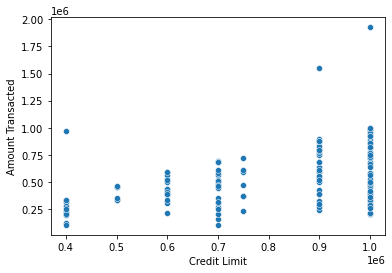

In [100]:
sns.scatterplot(data = new_df, x='Credit Limit', y='Amount Transacted') #Detecting outliers in the whole dataframe

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

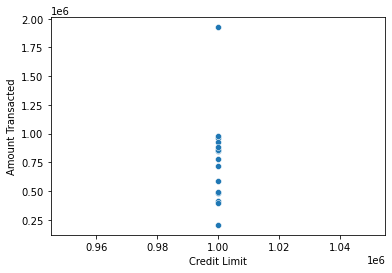

In [83]:
sns.scatterplot(data = Kenneth, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

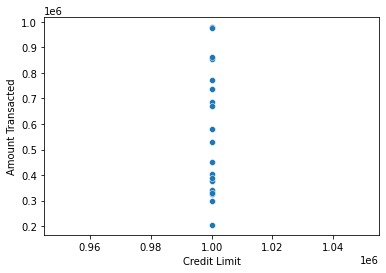

In [75]:
sns.scatterplot(data = Amanda, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

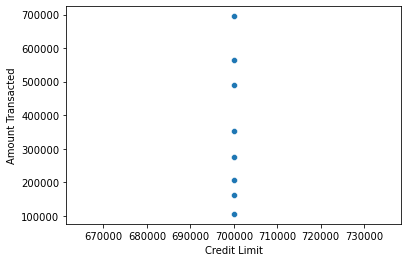

In [84]:
sns.scatterplot(data = Thomas, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

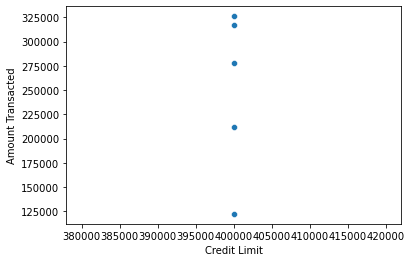

In [85]:
sns.scatterplot(data = Bobby, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

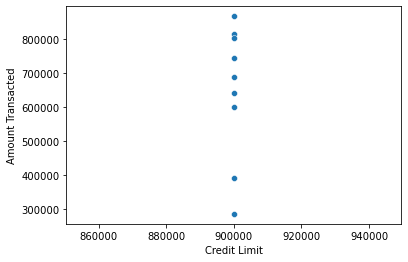

In [86]:
sns.scatterplot(data = Bradley, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

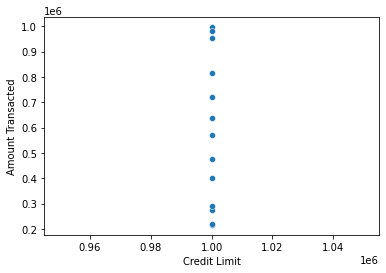

In [87]:
sns.scatterplot(data = Jessica, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

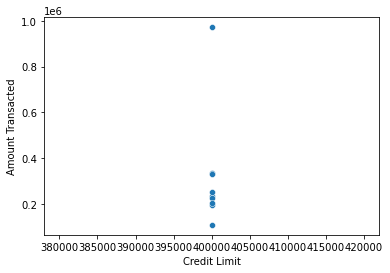

In [88]:
sns.scatterplot(data = Rick, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

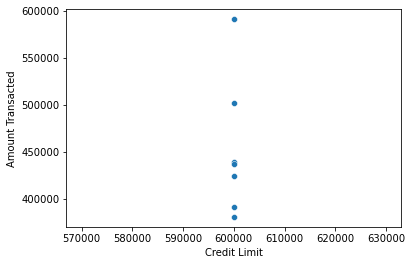

In [89]:
sns.scatterplot(data = Deborah, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

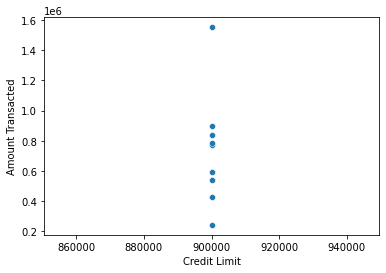

In [90]:
sns.scatterplot(data = Jeffrey, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

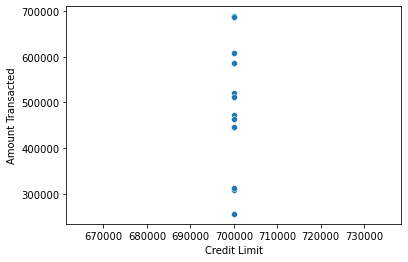

In [91]:
sns.scatterplot(data = Susan, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

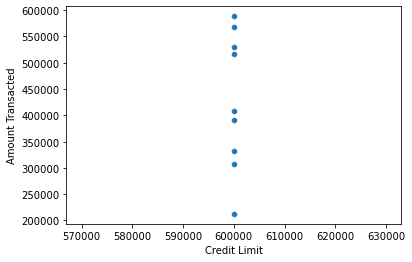

In [92]:
sns.scatterplot(data = Richard, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

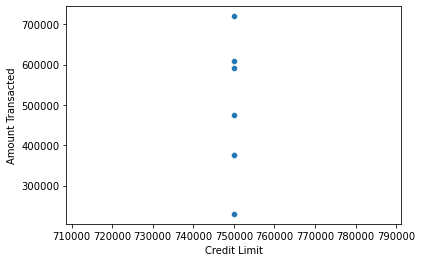

In [93]:
sns.scatterplot(data = Angelica, x='Credit Limit', y='Amount Transacted')

<AxesSubplot:xlabel='Credit Limit', ylabel='Amount Transacted'>

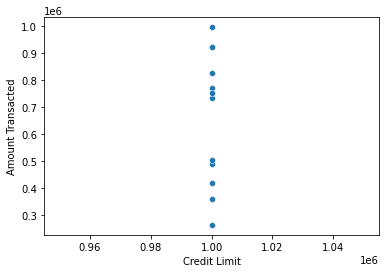

In [94]:
sns.scatterplot(data = Heather, x='Credit Limit', y='Amount Transacted')

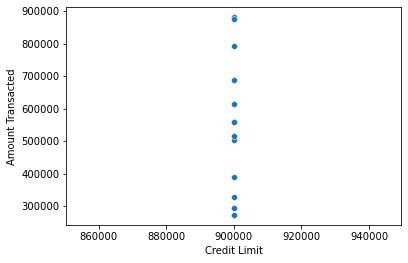

In [98]:
sns.scatterplot(data = Jacqueline, x='Credit Limit', y='Amount Transacted')


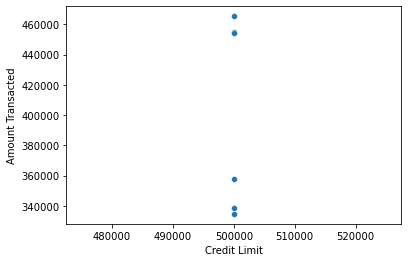

In [97]:
sns.scatterplot(data = Rebecca, x='Credit Limit', y='Amount Transacted')


## Distribution of Legit Transactions to Fraudulent Transactions

In [26]:
df2['Is_fraud'].value_counts()

0    146
1     11
Name: Is_fraud, dtype: int64

## Since this Dataset is highly unbalanced and we know that:

0 --> Normal Transaction
1 --> fraudulent transaction

In [27]:
# separating the data for analysis
legit = df2[df2.Is_fraud == 0]
fraud = df2[df2.Is_fraud == 1]

In [28]:
print(legit.shape)
print(fraud.shape)

(146, 16)
(11, 16)


In [29]:
# statistical measures of the data
legit.Amount.describe()

count         146
unique        146
top       965,721
freq            1
Name: Amount, dtype: object

In [30]:
fraud.Amount.describe()

count          11
unique         10
top       390,534
freq            2
Name: Amount, dtype: object

In [31]:
# compare the values for both transactions
df2.groupby('Is_fraud').mean()

,Transaction Number,Customer ID,No of Transactions
Is_fraud,,,
0,64389.842466,4.637192,1.657534
1,80652.909091,5.706364,2.545455


Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 11

In [32]:
legit_sample = legit.sample(n=11) # This makes sure that the legit transactions are as many as the fraudulent transactions. 
# This ensures that the machine has enough data for reference.

Concatenating two DataFrames


In [33]:
new_dataset = pd.concat([legit_sample, fraud], axis=0) # Axis = 0 ensures the data is entered row by row

# Concantenating means to link or to combine into one

In [34]:
new_dataset.head()

,Transaction Number,Customer ID,Time stamp,Category,Amount,First,Last,Gender,Street,City,Is_fraud,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
88,16186,3.58,10/01/2019 14:23,home,"436,294",Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,0,"600,000",2,"93,420",Gold,Success
50,50959,3.73,30/01/2019 17:57,home,"122,373",Bobby,Smith,M,3495 Williams Stream,San Diego,0,"400,000",2,"24,935",Signature,Success
51,586,6.04,01/01/2019 07:36,grocery_pos,"640,653",Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,0,"900,000",3,"89,201",Platinum,Success
46,48001,3.73,29/01/2019 01:39,grocery_pos,"211,899",Bobby,Smith,M,3495 Williams Stream,San Diego,0,"400,000",1,"47,886",Signature,Success
40,22174,2.23,14/01/2019 05:50,grocery_net,"207,755",Thomas,Hale,M,949 Smith Parkway,Cazenovia,0,"700,000",1,"95,466",Gold,Success


In [35]:
new_dataset.tail()

,Transaction Number,Customer ID,Time stamp,Category,Amount,First,Last,Gender,Street,City,Is_fraud,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
54,29421,6.04,05/02/2019 07:25,misc_pos,"688,577",Bradley,Martinez,M,NaN,Cape Town,1,"900,000",1,"83,263",Platinum,Success
55,54021,6.04,05/02/2019 08:25,misc_pos,"390,534",Bradley,Martinez,M,NaN,Cape Towm,1,"900,000",2,0,Platinum,Success
75,14729,3.72,09/01/2019 08:18,grocery_pos,"590,800",Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,1,"400,000",3,"99,168",Signature,Failed
97,33825,4.04,21/01/2019 02:22,misc_pos,"553,907",Jeffrey,Lewis,M,24255 Bryan Square,Palermo,1,"900,000",3,"49,298",Platinum,Failed
122,435755,5.02,14/07/2019 01:50,grocery_pos,"719,835",Angelica,Lopez,F,9599 Washington Field Suite 238,New York City,1,"750,000",1,"832,630",Gold,Failed


In [37]:
new_dataset['Is_fraud'].value_counts()

0    11
1    11
Name: Is_fraud, dtype: int64

In [38]:
new_dataset.groupby('Is_fraud').mean()

,Transaction Number,Customer ID,No of Transactions
Is_fraud,,,
0,60102.363636,4.008182,1.818182
1,80652.909091,5.706364,2.545455
